<a href="https://colab.research.google.com/github/MeidanGR/Titanic_Survivers_ML_Challenge/blob/main/Titanic_ML_kaggle_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic RMS Survivors Classification Problem**
As part of Machine Learning fundumantals course, taught by **Dr. Dima Alberg**.

SCE College, Be'er sheva, IL, 2021.

By:
**Avichay Kelangel & Meidan Greenberg**


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# **PACKAGES & DATA IMPORT**

In [2]:
# importing train and test data into train_df and test_df dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Titanic/test.csv')

# **DATA REVIEW**

In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
560,561,F,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
103,104,F,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
775,776,F,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
606,607,F,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
198,199,T,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


## **VISUALIZATIONS**
For statistical analysis.

[Text(0.5, 1.0, 'Gender distribution for the ones that survived')]

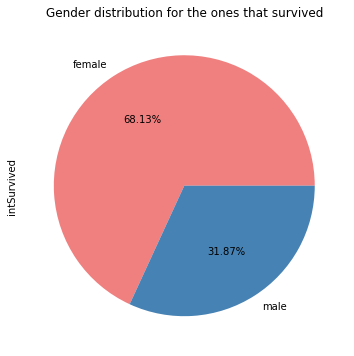

In [ ]:
# Train 'Sex' pie chart

train['intSurvived'] = train['Survived'].apply(lambda x:1 if x =="T" else 0)
gen_sur = train.groupby("Sex")["intSurvived"].sum() # sum Survived == "True" for each gender.
gen_sur.plot.pie(figsize=(11, 6), autopct="%.2f%%", colors = ['lightcoral', 'steelblue']).set(title='Gender distribution for the ones that survived')

It can be seen that 68.13% of women survived compared to 31.87% of men, meaning that there seems to be a dependency between gender and chances of survival.

[Text(0.5, 1.0, 'Embarking stations count')]

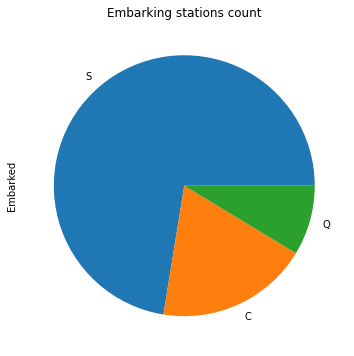

In [ ]:
# Train 'Embarked' pie chart
train.Embarked.value_counts().plot(kind='pie', figsize = (11,6)).set(title='Embarking stations count')

[Text(0.5, 1.0, 'No. of cabins depending on survival')]

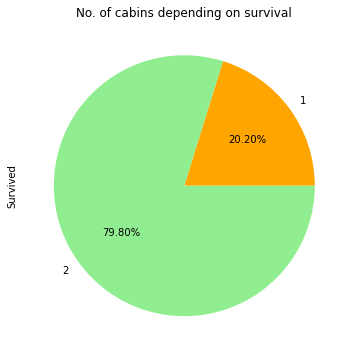

In [ ]:
# Cabin count before null replacement
train['Cabincount'] = np.where(train.Cabin.str.contains(" "), 2, 1)

cab_sur = train.groupby("Cabincount")["Survived"].count()
cab_sur.plot.pie(figsize=(11, 6), autopct="%.2f%%", colors = ['orange', 'lightgreen']).set(title='No. of cabins depending on survival')

Referring to the Cabin column which was translated into the number of cells depending on the chance of survival, it can be seen that passengers with 2 cells have a higher chance of survival, and this figure has the potential to predict the chances of survival in the models.

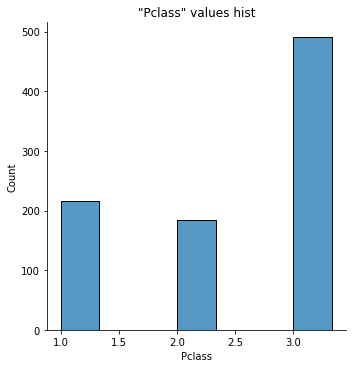

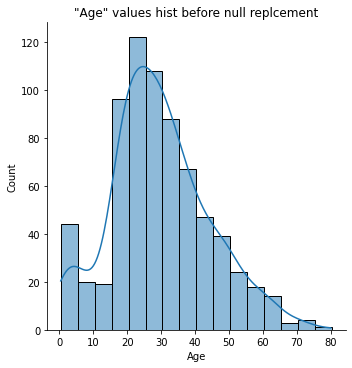

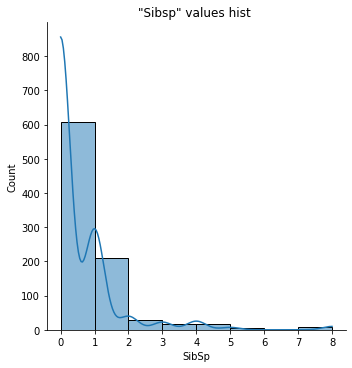

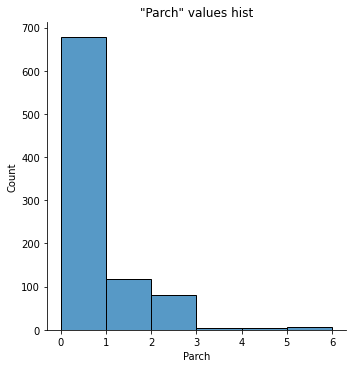

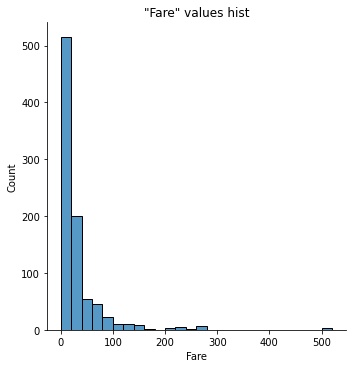

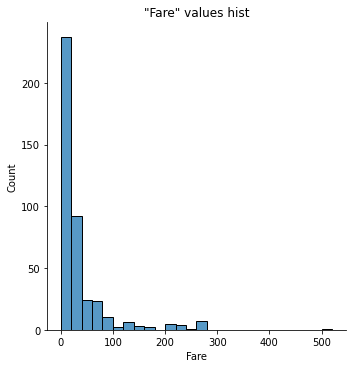

In [4]:
# Train 'Pclass' values hist 
sns.displot(train.Pclass, binwidth=1/3).set(title='"Pclass" values hist')

# Train 'Age' values hist 
sns.displot(train.Age, binwidth=5,kde=True).set(title='"Age" values hist before null replcement')

# Train 'Sibsp' values hist
sns.displot(train.SibSp, binwidth=1,kde=True).set(title='"Sibsp" values hist ')

# Train 'Parch' values hist 
sns.displot(train.Parch, binwidth=1).set(title='"Parch" values hist')

# Train 'Fare' values hist 
sns.displot(train.Fare, binwidth=20).set(title='"Fare" values hist')

# Test 'Fare' values hist 
sns.displot(test.Fare, binwidth=20).set(title='"Fare" values hist')

# **NULL REPLACEMENT**

In [ ]:
# printing training data information 
# (number of non-null observations, datatype)
print(train.info())
print('-'*100)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  intSurvived  891 non-null    int64  
 13  Cabincount   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 

We can see null values in columns 'Age', 'Cabin', & 'Embarked' in the train set, and in columns 'Age', 'Fare', & 'Cabin' in the test set.

The null replacement procedure is executed by 2 methods:
- On the train data, where we have the target variable ('Survived'), a null value will be replaced with summarizing the existing data depending on survival status.

- On the test data, nulls where survival status is not available, a more general null replacement will be executed.

In [ ]:
# Train set 'Age' column missing values replacement
train_df = train.copy(deep = True)

ct_notna = ((train_df['Age'].notna()) & (train_df['Survived'] == 'T'))
ct_isna = ((train_df['Age'].isna()) & (train_df['Survived'] == 'T'))
ft_notna = ((train_df['Age'].notna()) & (train_df['Survived'] == 'F'))
ft_isna = ((train_df['Age'].isna()) & (train_df['Survived'] == 'F'))

# 'Age' missing values are replaced with the median of the existing values, 
#   because it is a rounded number (29) contrary to the mean (29.699)
train_df.loc[ct_isna,'Age'] = train_df.loc[ct_isna,'Age'].fillna(train_df.loc[ct_notna,'Age'].mean()) 
train_df.loc[ft_isna,'Age'] = train_df.loc[ft_isna,'Age'].fillna(train_df.loc[ft_notna,'Age'].mean())

In [ ]:
# Train set 'Cabin' column missing values replacement

ct_notna = ((train_df['Cabin'].notna()) & (train_df['Survived'] == 'T'))
ct_isna = ((train_df['Cabin'].isna()) & (train_df['Survived'] == 'T'))
ft_notna = ((train_df['Cabin'].notna()) & (train_df['Survived'] == 'F'))
ft_isna = ((train_df['Cabin'].isna()) & (train_df['Survived'] == 'F'))

# 'Cabin' missing values are replaced with the most frequent value.
train_df.loc[ct_isna,'Cabin'] = train_df.loc[ct_isna,'Cabin'].fillna(train_df.loc[ct_notna,'Cabin'].mode()[0]) 
train_df.loc[ft_isna,'Cabin'] = train_df.loc[ft_isna,'Cabin'].fillna(train_df.loc[ft_notna,'Cabin'].mode()[0])

In [ ]:
# Train set 'Embarked' column missing values replacement

ct_notna = ((train_df['Embarked'].notna()) & (train_df['Survived'] == 'T'))
ct_isna = ((train_df['Embarked'].isna()) & (train_df['Survived'] == 'T'))
ft_notna = ((train_df['Embarked'].notna()) & (train_df['Survived'] == 'F'))
ft_isna = ((train_df['Embarked'].isna()) & (train_df['Survived'] == 'F'))

# 'Embarked' missing values are replaced with the most frequent value.
train_df.loc[ct_isna,'Embarked'] = train_df.loc[ct_isna,'Embarked'].fillna(train_df.loc[ct_notna,'Cabin'].mode()[0]) 
train_df.loc[ft_isna,'Embarked'] = train_df.loc[ft_isna,'Embarked'].fillna(train_df.loc[ft_notna,'Cabin'].mode()[0])

In [ ]:
# Test set missing values replacement
def m(data):
    d = data.copy(deep = True)
    for c in data:
        if (data[c].dtype =='int64') or (data[c].dtype =='float64') : 
            if data[c].isnull().values.any():
                m = data[c].dropna().mean()
                d[c].fillna(m, inplace=True)
        else:  
    
            if data[c].isnull().values.any() or data[c].isna().values.any():
                m = data[c].dropna().mode()[0]
                d[c].fillna(m, inplace=True)
    return d

test_df = m(test)

In [ ]:
# printing training data information after missing values treatment
print(train_df.info())
print('-'*100)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  intSurvived  891 non-null    int64  
 13  Cabincount   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 

# **VARIABLES MANIPULATION & ADD**

## Manipulation:
*   Categorical variables with 2 options will be converted to a binary variable.
*   Categorical variables with 3+ options will be converted to One-Hot encoding.

## Adding new variables
*   'Cabincount': (int) counts the number of cabins per passenger, by logic - the more cabins = more family members or important equipment, the less chance of survival. But it can be contrary.
*   'IsEmp': (bool) stating if a passenger is an employee. Employees stay in lower decks, as well as operating areas of the board.
*   'Relatives': (int), counts the number of relatives of a passenger.
*   'isAlone': (bool, stating if a person came alone on board.







In [ ]:
combine = [train_df, test_df]

for dataset in combine:
    # Manipulating existing variables
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    one_hot = pd.get_dummies(dataset['Embarked'])
    dataset['Emb_OHE_C'] = one_hot['C']
    dataset['Emb_OHE_Q'] = one_hot['Q']
    dataset['Emb_OHE_S'] = one_hot['S']
    
    one_hot = pd.get_dummies(dataset['Pclass'])
    dataset['Class_A'] = one_hot.iloc[:,0]
    dataset['Class_B'] = one_hot.iloc[:,1]
    dataset['Class_C'] = one_hot.iloc[:,2]
    
    # Adding new variables
    dataset['Cabincount'] = dataset['Cabin'].str.count(' ') +1
    dataset['isEmp'] = np.where(dataset['Fare'] == 0.0, True, False).astype(int)
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'isAlone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'isAlone'] = 1
    dataset['isAlone'] = dataset['isAlone'].astype(int)
    

In [ ]:
train_df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabincount,Emb_OHE_C,Emb_OHE_Q,Emb_OHE_S,Class_A,Class_B,Class_C,isEmp,Relatives,isAlone
315,316,T,3,"Nilsson, Miss. Helmina Josefina",1,26.000000,0,0,347470,7.8542,...,2,0,0,1,0,0,1,0,0,1
264,265,F,3,"Henry, Miss. Delia",1,30.626179,0,0,382649,7.7500,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
test_df.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Emb_OHE_C,Emb_OHE_Q,Emb_OHE_S,Class_A,Class_B,Class_C,Cabincount,isEmp,Relatives,isAlone
95,987,3,"Tenglin, Mr. Gunnar Isidor",0,25.0,0,0,350033,7.7958,B57 B59 B63 B66,...,0,0,1,0,0,1,4,0,0,1
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,...,1,0,0,1,0,0,1,0,1,0


# **Features Selection**

In [ ]:
# Selecting K best features using sklearn.

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

feature_cols = ['Class_A','Class_B', 'Class_C', 'Sex', 'Age', 'Relatives','isAlone','SibSp', 'Parch', 'Fare', 'Cabincount', 'isEmp', 'Emb_OHE_C', 'Emb_OHE_Q','Emb_OHE_S']
X = train_df[feature_cols]
Y = train_df.iloc[:,2]
selector = SelectKBest(mutual_info_classif, k=10).fit_transform(X, Y)
selector_df = pd.DataFrame(selector)

selector_df[:5]

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,22.0,1.0,1.0,7.2500,0.0,0.0,1.0
1,1.0,0.0,0.0,38.0,1.0,1.0,71.2833,1.0,0.0,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,0.0,0.0,35.0,1.0,1.0,53.1000,0.0,0.0,1.0
4,0.0,0.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


In [ ]:
# In order to interpret the output features, the same first lines of 'train_df' are presented, and a manual matching is preformed.

print(train_df[feature_cols].head(5)) # ['Class_A','Class_B','Class_C', 'Sex', 'Age', 'Relatives', 'Fare', 'Cabincount', 'Emb_OHE_C', 'Emb_OHE_Q']

   Class_A  Class_B  Class_C  Sex   Age  Relatives  isAlone  SibSp  Parch  \
0        0        0        1    0  22.0          1        0      1      0   
1        1        0        0    1  38.0          1        0      1      0   
2        0        0        1    1  26.0          0        1      0      0   
3        1        0        0    1  35.0          1        0      1      0   
4        0        0        1    0  35.0          0        1      0      0   

      Fare  Cabincount  isEmp  Emb_OHE_C  Emb_OHE_Q  Emb_OHE_S  
0   7.2500           1      0          0          0          1  
1  71.2833           1      0          1          0          0  
2   7.9250           2      0          0          0          1  
3  53.1000           1      0          0          0          1  
4   8.0500           1      0          0          0          1  


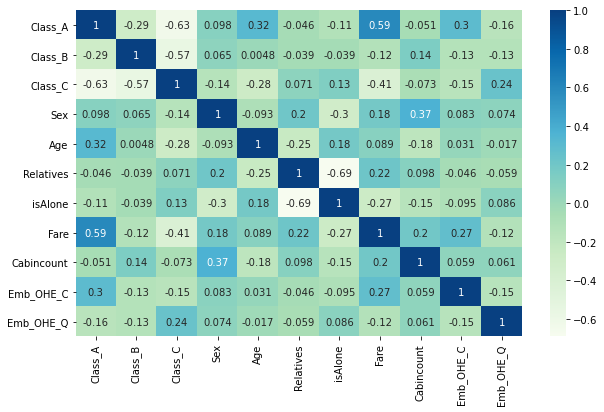

In [ ]:
# Heatmap: correlation between selected features from KBestFeatures output.
data = train_df.copy(deep=False)
cols = ['Class_A','Class_B','Class_C', 'Sex', 'Age', 'Relatives', 'isAlone', 'Fare', 'Cabincount', 'Emb_OHE_C', 'Emb_OHE_Q']

corrmat = data[cols].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="GnBu")

Interpreting the heatmap, it can be seen that there is no high correlation between any pair of features (above 0.8), so using all of them may result in train accuracy without over-learning.

In [ ]:
# preparing training data
cols = ['Class_A','Class_B','Class_C', 'Sex', 'Age', 'Relatives', 'isAlone', 'Fare', 'Emb_OHE_C', 'Emb_OHE_Q']

x = train_df[cols]
y = train_df['Survived']
xx = test_df[cols]

# **MODELS AND PREDICTIONS**

In [ ]:
# GridSearchCV is being used in every model and wraps with VotingClassifier.

from sklearn.ensemble import VotingClassifier
# https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


'''
GridSearchCV is combining all of the parameters given to every model to find the best accuracy.
VotingClassifier is an Ensamble model using all of the optimized models' predictions to create the best overall prediction. 
'''

#--------------------------------------------
grid_params_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,6),
    'min_samples_split' : range(2,10),
    'min_samples_leaf' : range(1,10)
}

tree_model = GridSearchCV(
            DecisionTreeClassifier(),
            grid_params_tree,
            verbose = 1,
            cv = 10,
            n_jobs = -1,
            error_score='raise'
            )
tree_model_res = tree_model.fit(x, y)
print(tree_model_res.best_params_)
tree_model_pred = tree_model.predict(x) 
#--------------------------------------------
grid_params_knn = {
    'n_neighbors': range(2,16,1),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']    
}

knn_model = GridSearchCV(
            KNeighborsClassifier(),
            grid_params_knn,
            verbose = 1,
            cv = 10,
            n_jobs = -1,
            error_score='raise'
            )
knn_model_res = knn_model.fit(x, y)
print(knn_model_res.best_params_)
knn_model_pred = knn_model.predict(x) 
#--------------------------------------------
grid_params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_model = GridSearchCV(
            GaussianNB(),
            grid_params_nb,
            verbose = 1,
            cv = 10,
            n_jobs = -1,
            error_score='raise'
            )
nb_model_res = nb_model.fit(x, y)
print(nb_model_res.best_params_)
nb_model_pred = nb_model.predict(x) 
#--------------------------------------------

voting_model = VotingClassifier(estimators=[('tree_model', tree_model), 
                                            #('knn_model', knn_model), #KNN keeps overfitting.
                                            ('nb_model', nb_model)
                                            ], voting='hard')

voting_model.fit(x, y)
voting_model_pred = voting_model.predict(x) 

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
Fitting 10 folds for each of 224 candidates, totalling 2240 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2240 out of 2240 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'var_smoothing': 1.2328467394420658e-05}
Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.6s finished


In [ ]:
from sklearn.metrics import accuracy_score
tree_model_train_prediction_accuracy =  round(accuracy_score(y, tree_model_pred)*100,2)
knn_model_train_prediction_accuracy =  round(accuracy_score(y, knn_model_pred)*100,2)
nb_model_train_prediction_accuracy =  round(accuracy_score(y, nb_model_pred)*100,2)
voting_model_train_prediction_accuracy =  round(accuracy_score(y, voting_model_pred)*100,2)

print('Tree model score:',tree_model_train_prediction_accuracy)
print('KNN model score:',knn_model_train_prediction_accuracy)
print('NB model score:',nb_model_train_prediction_accuracy)
print('Voting model score:',voting_model_train_prediction_accuracy)

Tree model score: 85.3
KNN model score: 98.88
NB model score: 77.22
Voting model score: 80.47


In [ ]:
yy = voting_model.predict(xx) 

The voting model is the must stable among the models, bringing **test-set** **accuracy of 81.339%.**

===================================================================================================================

In [ ]:
# preparing submission file
submission = pd.DataFrame( { 'PassengerId': test['PassengerId'] , 'Survived': yy } )
submission.to_csv('akmg_votingOngrid.csv' , index = False )

===================================================================================================================